In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# importing binary classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#split data library
from sklearn.model_selection import train_test_split

In [4]:
# importing evaluators in models
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay 

In [5]:
# importing dataset as dataframe
heart_df=pd.read_csv("data/heart-disease.csv")
heart_df.shape

(303, 14)

In [6]:
# check top 5 rows
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#check top 10 rows
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
# number of ones and zeros in label
heart_df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [9]:
# now taking the value counts as percentage using normalize parameter
np.round(heart_df["target"].value_counts(normalize=True)*100,2)

target
1    54.46
0    45.54
Name: proportion, dtype: float64

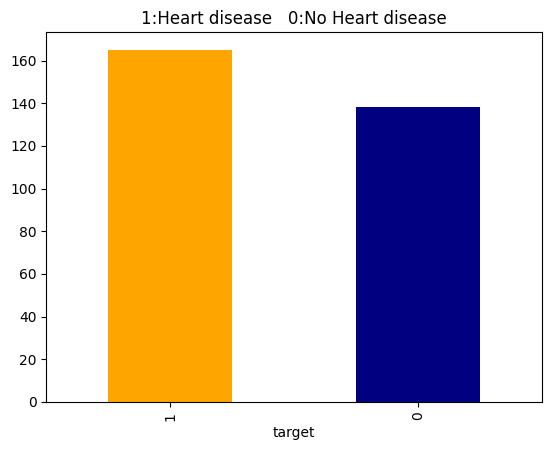

In [10]:
# ploting the value counts
heart_df["target"].value_counts().plot.bar(title="1:Heart disease   0:No Heart disease",color=["orange","navy"]);

In [11]:
# To check there is no null values we use .info()
heart_df.info()
# we can see below there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# .describe() is to check the satistical parameters(mean,median,standard deviation etc) of the numerical data in the DataFrame.
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Counting the number of male=1 and female=0 in the sex column
heart_df["sex"].value_counts()
# Hence there are 207 males and 96 females

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
# now comparing target column with sex column
compare_tar_sex_df=pd.crosstab(heart_df["target"],heart_df["sex"])
compare_tar_sex_df
# Here we can see that out of 96 females , 72 are positive heart disease(i.e approx 75% are positive) and in 207 males 93 are 
# positive heart disease(i.e approx 46% are positive) thus we can say that average 60.5% people are heart disease positive.

sex,0,1
target,,
0,24,114
1,72,93


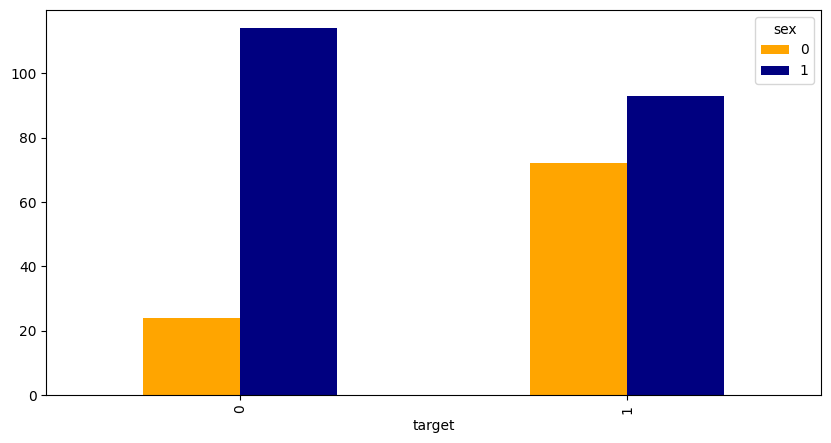

In [15]:
# now ploting target v/s sex
compare_tar_sex_df.plot.bar(figsize=(10,5),color=["orange","navy"]);

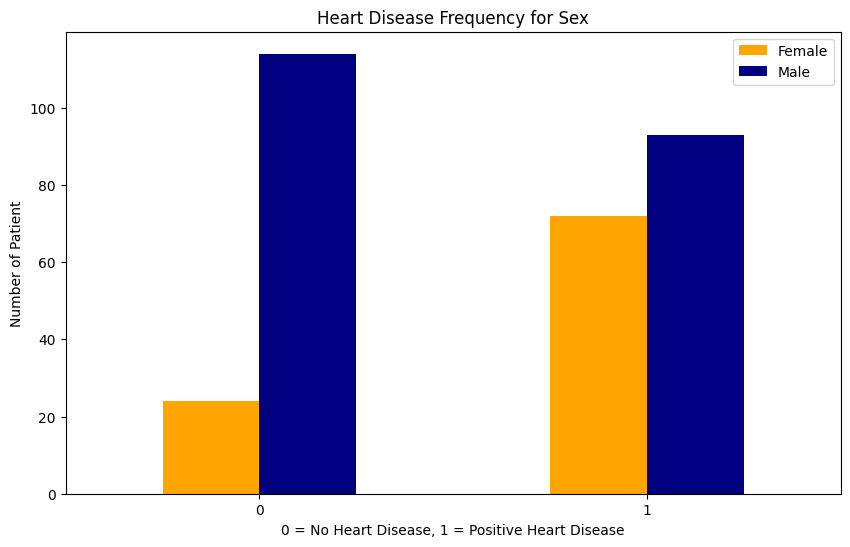

In [16]:
# Adding more attributes with the above graph
fig, ax = plt.subplots(figsize=(10, 6));
compare_tar_sex_df.plot.bar(color=["orange", "navy"], ax=ax);
ax.set(title="Heart Disease Frequency for Sex",
       xlabel="0 = No Heart Disease, 1 = Positive Heart Disease",
       ylabel="Number of Patient");
ax.legend(["Female","Male"]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

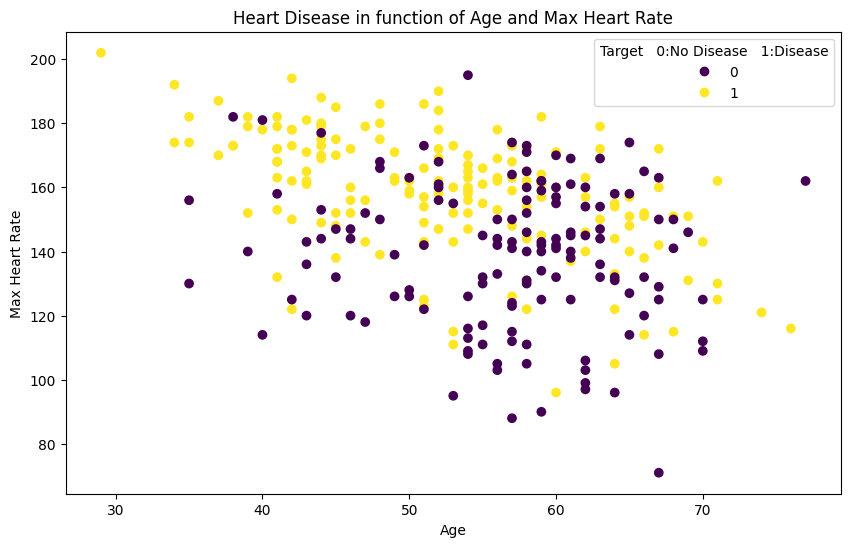

In [17]:
# Ploting scatter plot between Age and Max Heart Rate
fig , ax = plt.subplots(figsize=(10,6))
scatter0=ax.scatter(
                     x=heart_df["age"],
                     y=heart_df["thalach"],
                     c=heart_df["target"]
                   );
ax.set(title="Heart Disease in function of Age and Max Heart Rate",xlabel="Age",ylabel="Max Heart Rate");
ax.legend(*scatter0.legend_elements(),title="Target   0:No Disease   1:Disease");
plt.show();

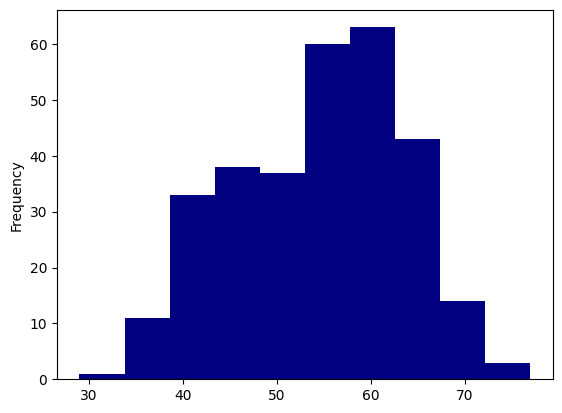

In [18]:
# analyse the age data using histogram 
heart_df["age"].plot.hist(color="navy");
# we can see that it is like normal distribution which is shifted towards right and can verified by above graph.

In [19]:
compare_cp_tar_df=pd.crosstab(heart_df["cp"],heart_df["target"]);
compare_cp_tar_df

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


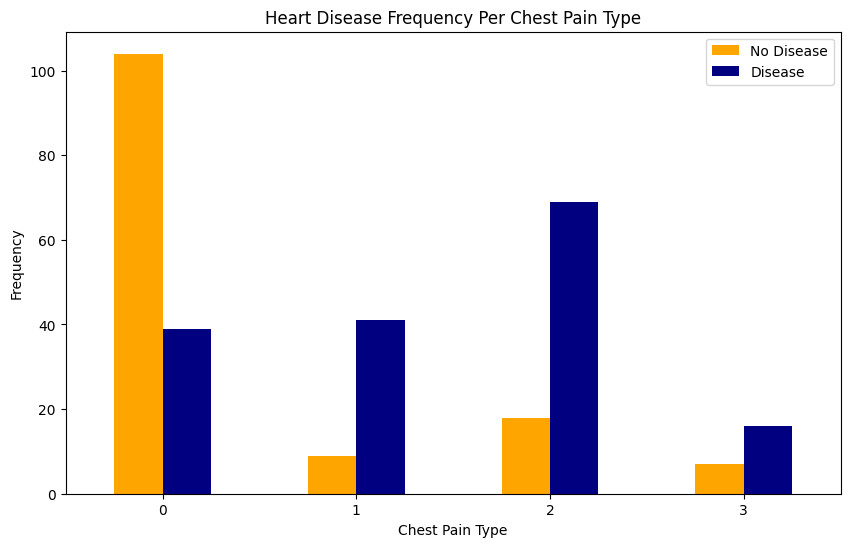

In [20]:
# now ploting the above crosstab 
fig, ax = plt.subplots(figsize=(10,6));
compare_cp_tar_df.plot.bar(color=["orange","navy"],ax=ax);
ax.set(title="Heart Disease Frequency Per Chest Pain Type",xlabel="Chest Pain Type",ylabel="Frequency");
ax.legend(["No Disease", "Disease"]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

In [21]:
# Now finding the correlation between independent variables using .corr() function
correlation_matrix=heart_df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


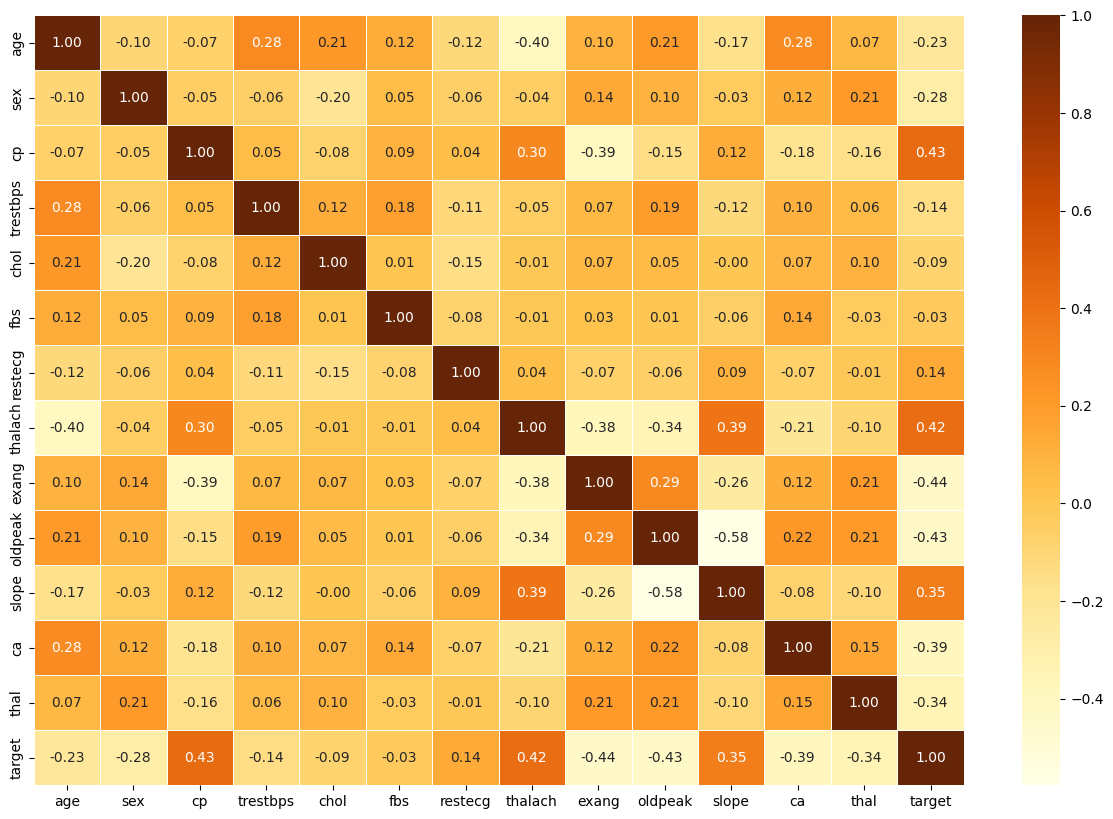

In [22]:
# now ploting the above correlation matrix 
fig , ax = plt.subplots(figsize=(15,10));
sns.heatmap(correlation_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlOrBr",ax=ax);
plt.show();

In [23]:
# Using .head() command to pick our label and features
heart_df.head()
# so target column is our label

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# now spliting into-
#Features
x=heart_df.drop("target",axis=1)

#label
y=heart_df["target"]

In [25]:
# Display x
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
# Display y
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# Now spliting the data into train test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [28]:
# Display x_train
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [29]:
# Display y_train
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [30]:
# Display x_test
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [31]:
# Display y_test
y_test, len(y_test)

(179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64,
 61)

In [32]:
# Now creating a function to evaluate different binary classification models
models = {
          "Logistic Regression": LogisticRegression(),
          "Support Vector Machines": LinearSVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest Classifier": RandomForestClassifier(),
          "Naive Bayes": GaussianNB(),
          "K-Nearest Neighbour": KNeighborsClassifier()
}

def Performance_of_models(models, x_train, x_test, y_train, y_test,random_state):
    precision = {}
    accuracy = {}
    recall = {}
    f1 = {}
    model_performance=[precision,accuracy,recall,f1]
    for model_name, model in models.items():
        print(f'Calculating evaluation metrics of model: {model_name}')
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        precision[model_name] = np.round(precision_score(y_test, y_predict)*100, 2)
        accuracy[model_name] = np.round(accuracy_score(y_test, y_predict)*100,2)
        recall[model_name] = np.round(recall_score(y_test, y_predict)*100,2)
        f1[model_name] = np.round(f1_score(y_test, y_predict)*100,2)
    return model_performance
model_evaluation=Performance_of_models(models=models,
                                        x_train=x_train,
                                        x_test=x_test,
                                        y_train=y_train,
                                        y_test=y_test,
                                        random_state=42)
model_evaluation       

Calculating evaluation metrics of model: Logistic Regression
Calculating evaluation metrics of model: Support Vector Machines
Calculating evaluation metrics of model: Decision Tree
Calculating evaluation metrics of model: Random Forest Classifier


C:\Users\ASUS\anaconda3\envs\Jupyter_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calculating evaluation metrics of model: Naive Bayes
Calculating evaluation metrics of model: K-Nearest Neighbour


[{'Logistic Regression': 87.88,
  'Support Vector Machines': 87.5,
  'Decision Tree': 92.59,
  'Random Forest Classifier': 84.38,
  'Naive Bayes': 90.0,
  'K-Nearest Neighbour': 68.57},
 {'Logistic Regression': 88.52,
  'Support Vector Machines': 86.89,
  'Decision Tree': 85.25,
  'Random Forest Classifier': 83.61,
  'Naive Bayes': 86.89,
  'K-Nearest Neighbour': 68.85},
 {'Logistic Regression': 90.62,
  'Support Vector Machines': 87.5,
  'Decision Tree': 78.12,
  'Random Forest Classifier': 84.38,
  'Naive Bayes': 84.38,
  'K-Nearest Neighbour': 75.0},
 {'Logistic Regression': 89.23,
  'Support Vector Machines': 87.5,
  'Decision Tree': 84.75,
  'Random Forest Classifier': 84.38,
  'Naive Bayes': 87.1,
  'K-Nearest Neighbour': 71.64}]

In [33]:
#Creating a Data Frame for evaluation matrix
model_evaluation = pd.DataFrame(model_evaluation,index=["Precision","Accuracy","Recall","F1_score"])
model_evaluation 

,Logistic Regression,Support Vector Machines,Decision Tree,Random Forest Classifier,Naive Bayes,K-Nearest Neighbour
Precision,87.88,87.50,92.59,84.38,90.00,68.57
Accuracy,88.52,86.89,85.25,83.61,86.89,68.85
Recall,90.62,87.50,78.12,84.38,84.38,75.00
F1_score,89.23,87.50,84.75,84.38,87.10,71.64


In [34]:
# now creating a Transpose of above dataframe
Transpose_models=model_evaluation.T
Transpose_models=pd.DataFrame(Transpose_models)
Transpose_models

,Precision,Accuracy,Recall,F1_score
Logistic Regression,87.88,88.52,90.62,89.23
Support Vector Machines,87.50,86.89,87.50,87.50
Decision Tree,92.59,85.25,78.12,84.75
Random Forest Classifier,84.38,83.61,84.38,84.38
Naive Bayes,90.00,86.89,84.38,87.10
K-Nearest Neighbour,68.57,68.85,75.00,71.64


In [35]:
# Creating Accuracy comparision DataFrame
acc_compare=pd.DataFrame(Transpose_models["Accuracy"])
acc_compare

,Accuracy
Logistic Regression,88.52
Support Vector Machines,86.89
Decision Tree,85.25
Random Forest Classifier,83.61
Naive Bayes,86.89
K-Nearest Neighbour,68.85


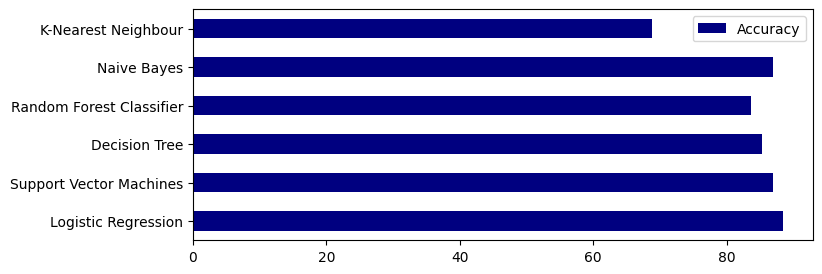

In [36]:
#Plotting The Accuracy Dataframe
acc_compare.plot.barh(color="navy",figsize=(8,3));

In [37]:
# Tuning KNN using n_neighbors
# list for train score and test score
train_scores = []
test_scores = []
np.random.seed(0)
neighbors=range(1,21)
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [38]:
# Display train score
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

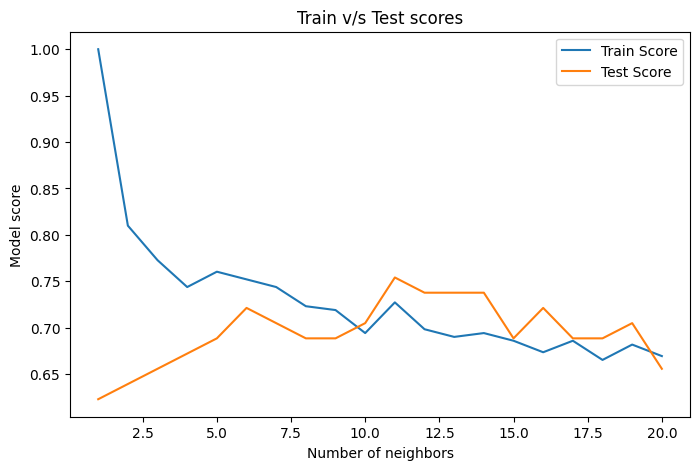

Maximum KNN score on the test data: 75.41%


In [40]:
# Now plotting train and test score for knn model
fig,ax=plt.subplots(figsize=(8,5));
ax.plot(neighbors,train_scores,label="Train Score");
ax.plot(neighbors,test_scores,label="Test Score");
ax.set(title="Train v/s Test scores",xlabel="Number of neighbors",ylabel="Model score");
ax.legend();
plt.show();
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [41]:
# Tuning Models with RandomisedSearchCV 
# for Logestic Regression
lr_grid=   {                                                 # setting the hyperparameter
            "C": np.logspace(-4, 4, 20),
            "solver": ["liblinear"]  
           }
np.random.seed(42)
rs_cv_lr = RandomizedSearchCV(

                                LogisticRegression(),
                                param_distributions=lr_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                             )
rs_cv_lr.fit(x_train,y_train)
print(f"The Best Parameters are:{rs_cv_lr.best_params_}and The Best score is:{rs_cv_lr.best_score_*100:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The Best Parameters are:{'solver': 'liblinear', 'C': 0.23357214690901212}and The Best score is:83.46%


In [42]:
# for Randomforestclassifier
rf_grid={                                                        # setting the hyperparameter
           "n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
        }
np.random.seed(42)
rs_cv_rf = RandomizedSearchCV(

                                RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                             )
rs_cv_rf.fit(x_train,y_train)
print(f"The Best Parameters are:{rs_cv_rf.best_params_}and The Best score is:{rs_cv_rf.best_score_*100:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The Best Parameters are:{'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}and The Best score is:83.05%


In [43]:
#Tuning models using GridSearchCV
#for LogisticRegression
grid = {                                                      # setting the hyperparameter     
          "C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]
       }

gs_cv_lr=GridSearchCV(
                          LogisticRegression(),
                          param_grid=grid,
                          cv=5,
                          verbose=True
                     )
gs_cv_lr.fit(x_train,y_train)
print(f"The Best Parameters are:{gs_cv_lr.best_params_}and The Best score is:{gs_cv_lr.best_score_*100:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The Best Parameters are:{'C': 0.23357214690901212, 'solver': 'liblinear'}and The Best score is:83.46%


In [44]:
# for grid search cv create y_pred
y_pred=gs_cv_lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
# Display y_test
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

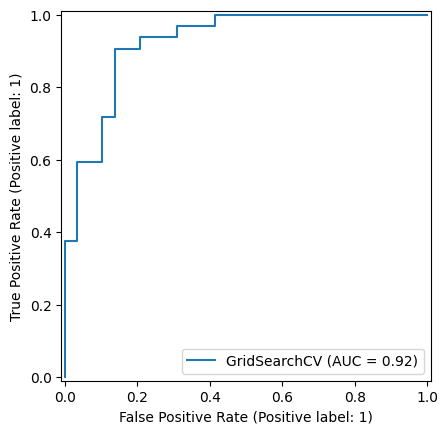

In [47]:
# Ploting roc-auc curve for gs_cv_lr model
RocCurveDisplay.from_estimator(estimator=gs_cv_lr,X=x_test,y=y_test);

In [48]:
#Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [66]:
# Creating a function to plot confusion matrix
def plot_cm(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                   annot=True,
                   cbar=False,
                  )
    ax.set(title="Confusion Mtrix",xlabel="Predicted values",ylabel="True values")
    


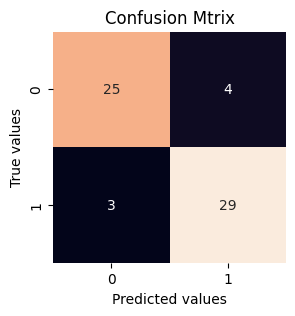

In [67]:
# plotting the confusion matrix 
plot_cm(y_test,y_pred)

In [68]:
# Now the best Parameter by Gridsearchcv 
gs_cv_lr.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [69]:
# creating the instance of model with best hyperparameter
lrm=LogisticRegression(C=0.23357214690901212,solver="liblinear")
# cross validated accuracy score
cv_acc = np.mean(cross_val_score(lrm,x,y,cv=5,scoring="accuracy"))
cv_acc

0.8479781420765027

In [70]:
# cv for precision
cv_precision = np.mean(cross_val_score(lrm,x,y,cv=5,scoring="precision"))
cv_precision

0.8215873015873015

In [71]:
# cv for recall
cv_recall = np.mean(cross_val_score(lrm,x,y,cv=5,scoring="recall"))
cv_recall

0.9272727272727274

In [72]:
# cv for f1_score
cv_f1 = np.mean(cross_val_score(lrm,x,y,cv=5,scoring="f1"))
cv_f1

0.8705403543192143

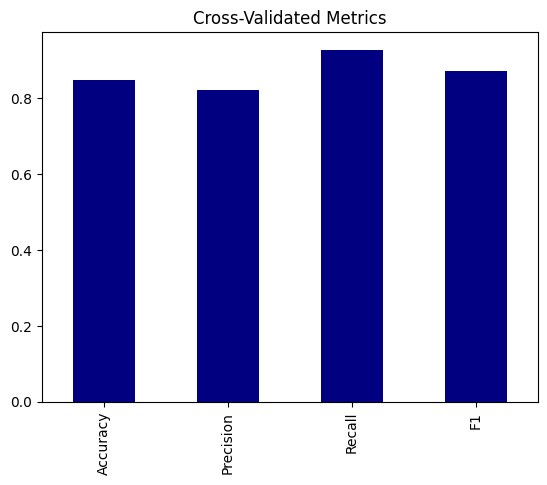

In [78]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame(
                            {"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                             index=[0]
                        )
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", color="navy",legend=False);

In [79]:
# Now Trainig the above lrm model
lrm.fit(x_train,y_train)
# display coef_
lrm.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [83]:
# now creating a key value pair between columns and their coef_ values
features_dict = dict(zip(heart_df.columns, list(lrm.coef_[0])))
features_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

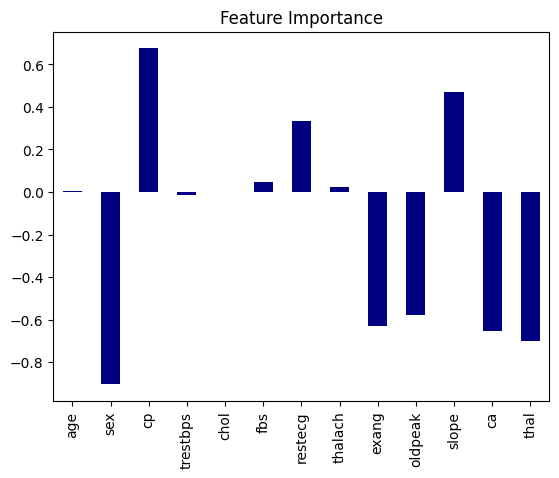

In [84]:
# Ploting features_dict to get better understanding
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False,color="navy");

In [85]:
# now comparing sex and target column with coef_ value i.e -904 
# means they are inversely related
compare_sex_tar_df= pd.crosstab(heart_df["sex"],heart_df["target"])
compare_sex_tar_df

target,0,1
sex,,
0,24,72
1,114,93


In [86]:
# now comparing slope and target column with coef_ value i.e 0.470
# means they are directly related
compare_slp_tar_df= pd.crosstab(heart_df["slope"],heart_df["target"])
compare_slp_tar_df

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
